# Excercisse 5 

running following simulation

```shell
(base) jakub.dokulil@nbm-imp-134 lj-canonical % ./gmclj
              n=512
            rho=0.002
              t=0.694
           disp=0.3
             dr=0.01
         ntskip=1
 ntprint/ntskip=1
   ntjob/ntskip=100
          fname=[mclj_in.dat] 
```

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import constants

plt.style.use('scandic')


In [6]:
def subsample_data(data, n):
    resample_shape = (sample_size//n, n)
    # print(resample_shape)
    resample_no_of_samples = np.product(resample_shape)
    subsample = data[:resample_no_of_samples]
    # print(subsample.shape)
    subsample = subsample.reshape(resample_shape)
    # print(subsample.shape)
    subsample = subsample.mean(axis=1)
    return subsample

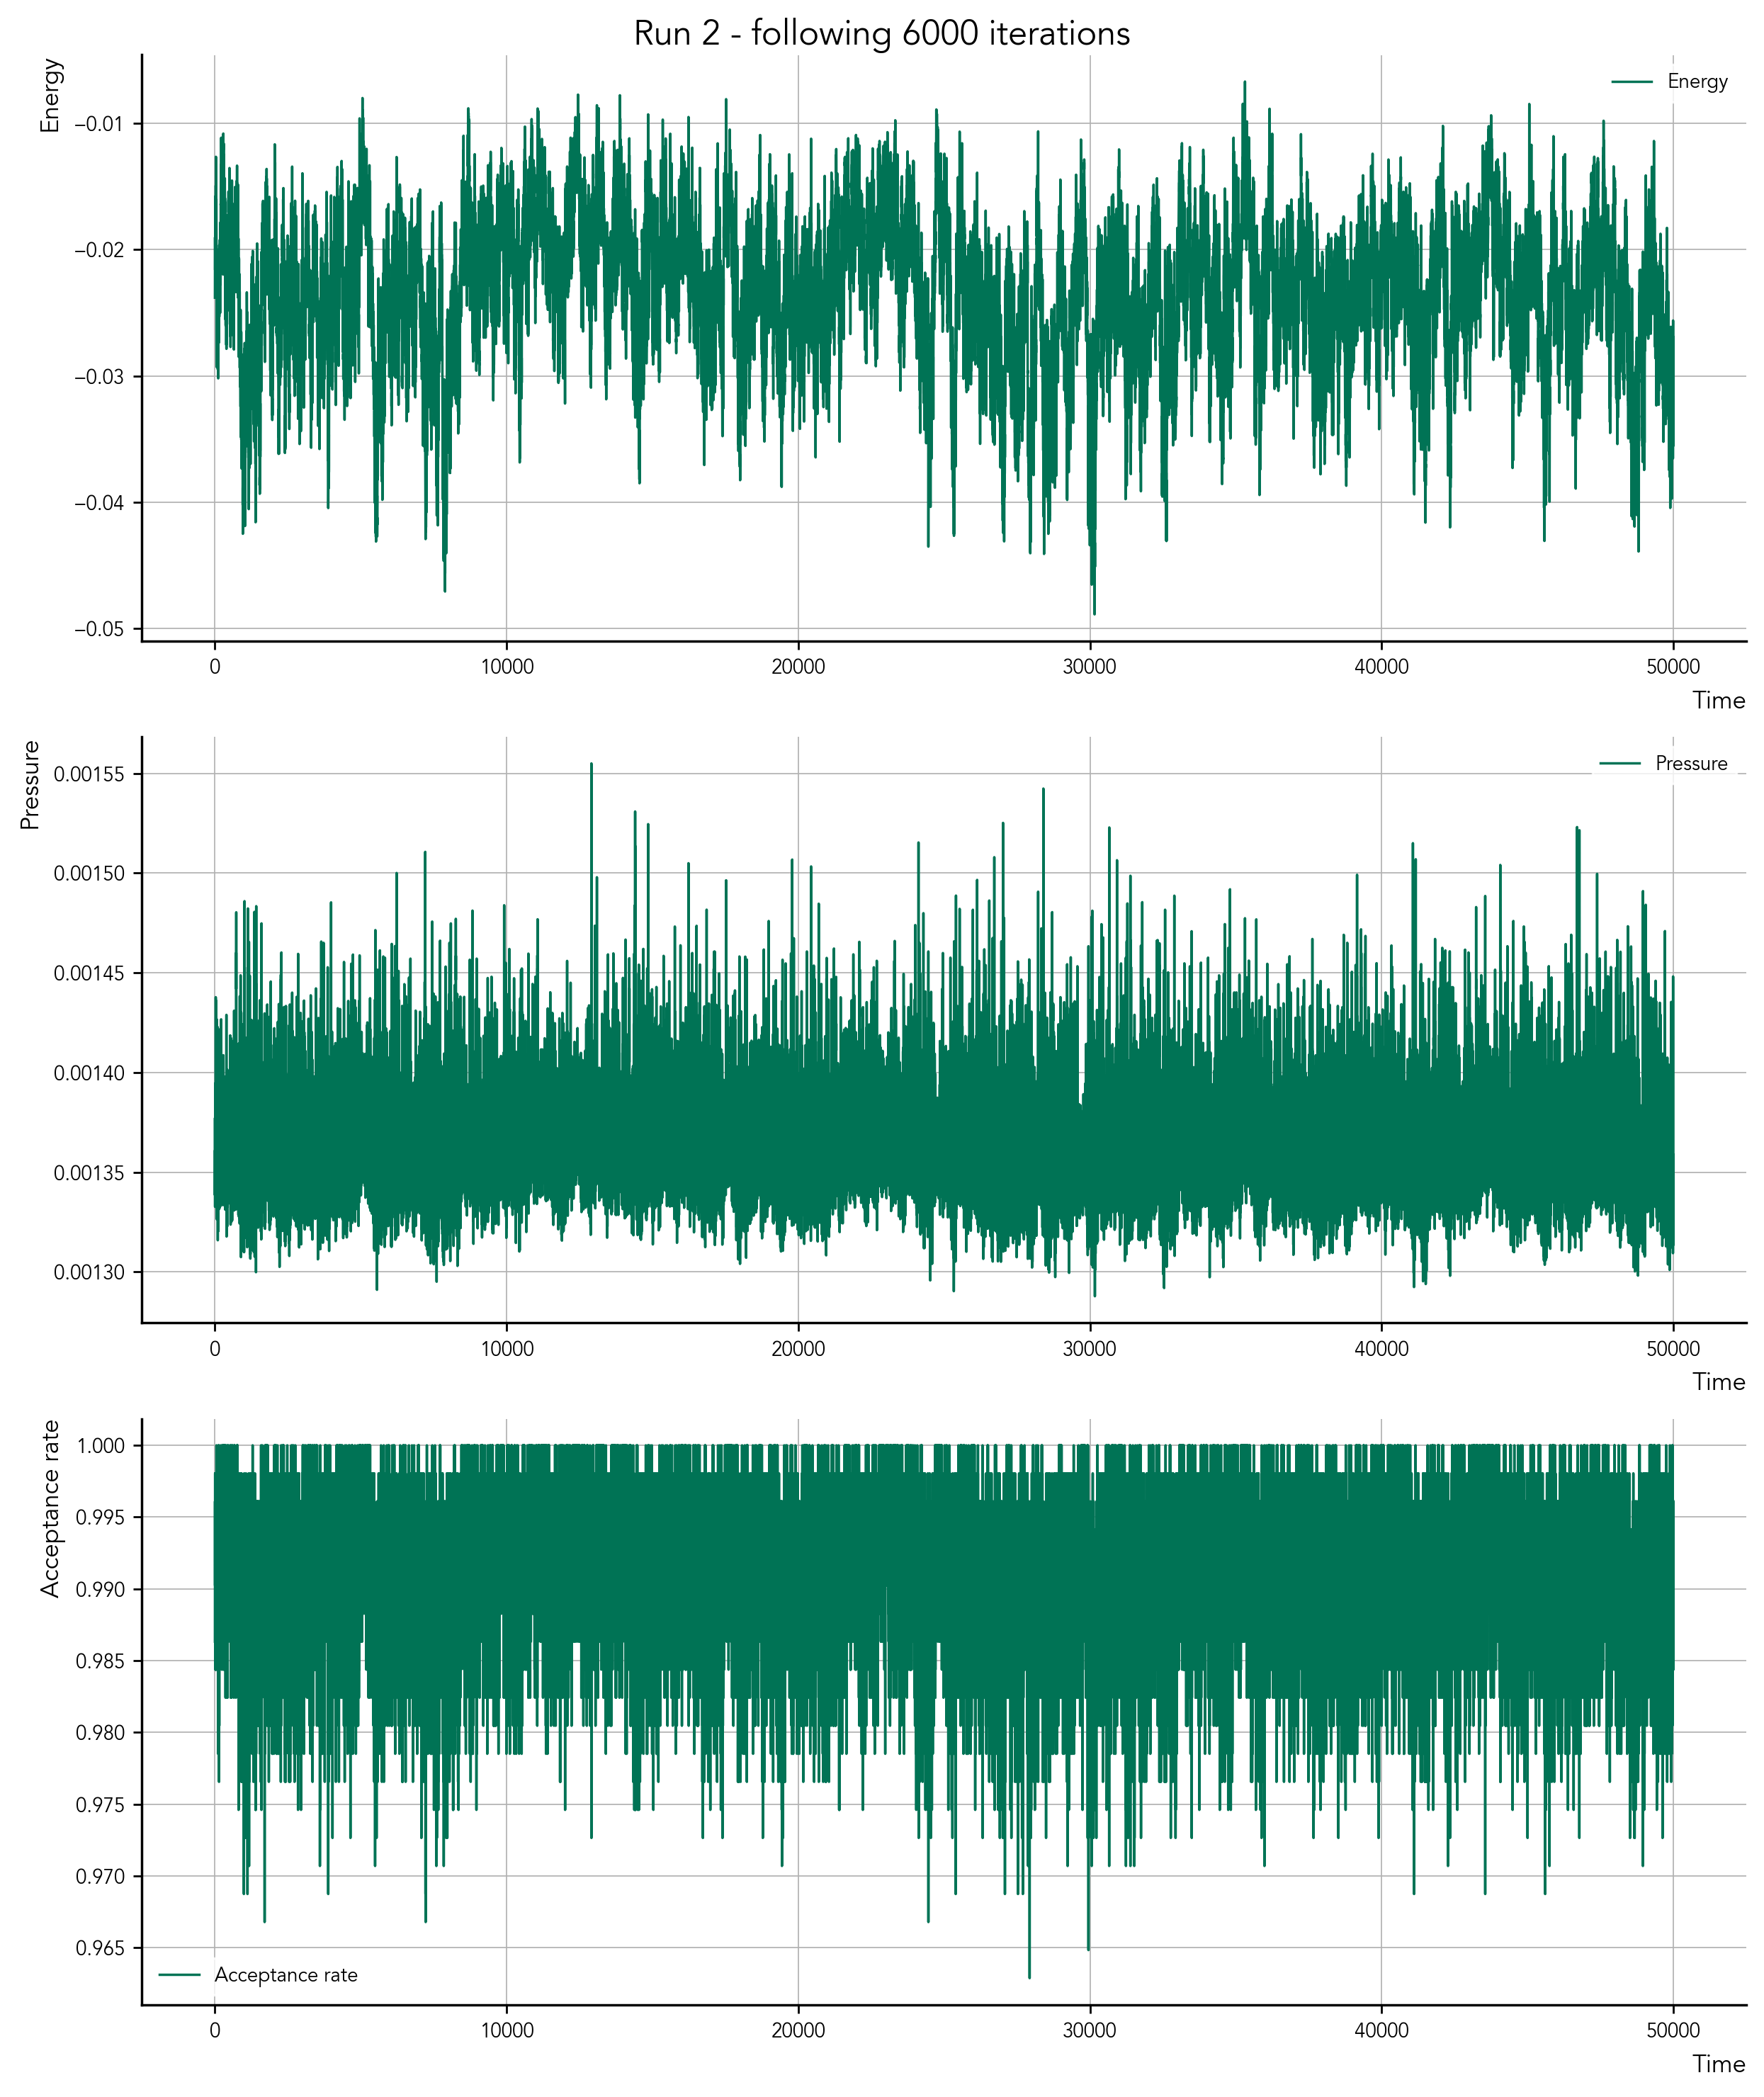

In [4]:
# Run 2

# read data
df_2 = pd.read_csv("results/exc_5_gas_2.dat", header=None, sep="\s+", index_col=0)

fig, axs = plt.subplots(3,1, figsize=(10,12))

# plot energy
axs[0].plot(df_2.index, df_2[2], label="Energy")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Energy")
axs[0].legend()

# plot pressure
axs[1].plot(df_2.index, df_2[3], label="Pressure")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Pressure")
axs[1].legend()

# plot acceptance rate
axs[2].plot(df_2.index, df_2[1], label="Acceptance rate")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Acceptance rate")
axs[2].legend()

# title 
fig.suptitle("Run 2 - following 6000 iterations")

fig.tight_layout()
plt.show()

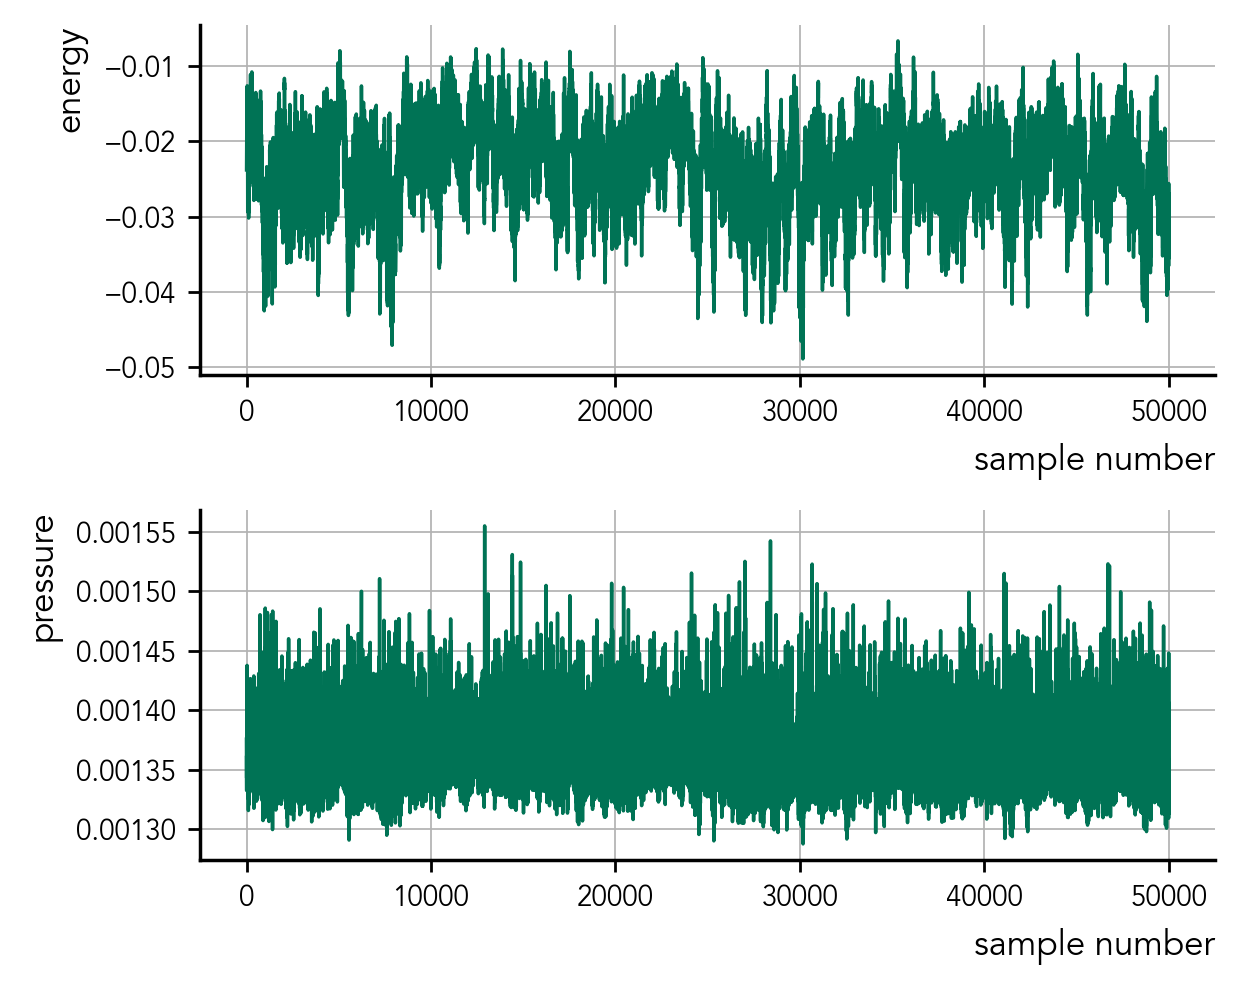

In [8]:
energy = df_2[2].to_numpy()   
pressure = df_2[3].to_numpy() 

fig, axs = plt.subplots(2, 1, figsize=(5, 4))

axs[0].plot(energy)
axs[0].set_xlabel('sample number')
axs[0].set_ylabel('energy')

axs[1].plot(pressure)
axs[1].set_xlabel('sample number')
axs[1].set_ylabel('pressure')

fig.tight_layout()

In [9]:
n_min = 10
n_max = 6000
step = 10

n = list(np.arange(n_min, n_max, step).astype(int)) # subsample sizes

energy_subsamples = [subsample_data(energy, i) for i in n]
pressure_subsamples = [subsample_data(pressure, i) for i in n]

energy_variances = np.array([np.var(i) for i in energy_subsamples])
pressure_variances = np.array([np.var(i) for i in pressure_subsamples])

# plot the mean and variance of the subsamples
fig, axs = plt.subplots(2, 1, figsize=(5, 4))

axs[0].plot(n, energy_variances, 'o', label='variance')
axs[0].plot(n, np.var(energy)/np.array(n), 'o', label='$\sigma^2$/n - expected value')

axs[0].set_xlabel('subsample size')
axs[0].set_ylabel('subsample variance')
axs[0].set_ylim(bottom=0)
axs[0].set_xlim(left=0)
axs[0].legend()

axs[1].plot(n, pressure_variances, 'o', label='variance')
axs[1].plot(n, np.var(pressure)/np.array(n), 'o', label='$\sigma^2$/n - expected value')

axs[1].set_xlabel('subsample size')
axs[1].set_ylabel('subsample variance')
axs[1].set_ylim(bottom=0)
axs[1].set_xlim(left=0)
axs[1].legend()

fig.tight_layout()


NameError: name 'sample_size' is not defined